[*********************100%***********************]  1 of 1 completed


Data from first five days of trading:
Price          Close      High       Low      Open     Volume
Ticker          NVDA      NVDA      NVDA      NVDA       NVDA
Date                                                         
2020-01-02  5.972162  5.972162  5.892752  5.943286  237536000
2020-01-03  5.876572  5.920384  5.827532  5.852425  205384000
2020-01-06  5.901215  5.906442  5.757083  5.783220  262636000
2020-01-07  5.972660  6.018463  5.884537  5.929594  314856000
2020-01-08  5.983862  6.025185  5.928350  5.968428  277108000


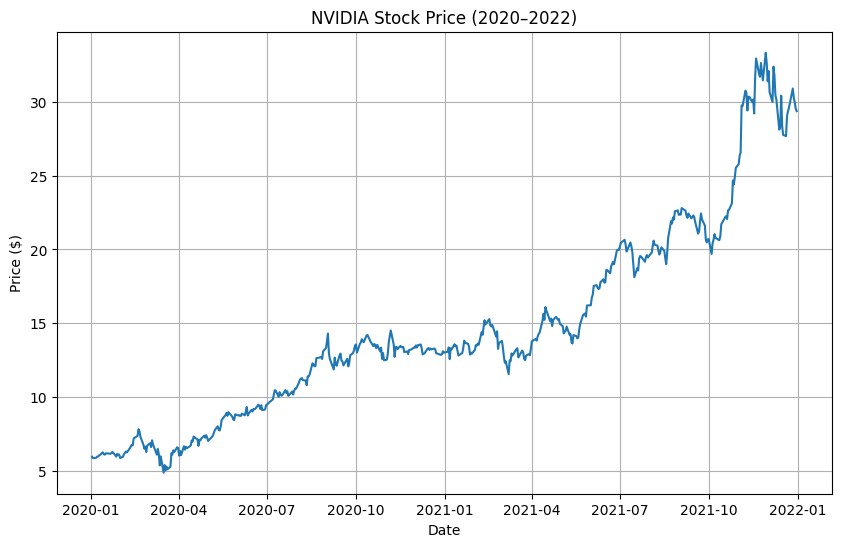

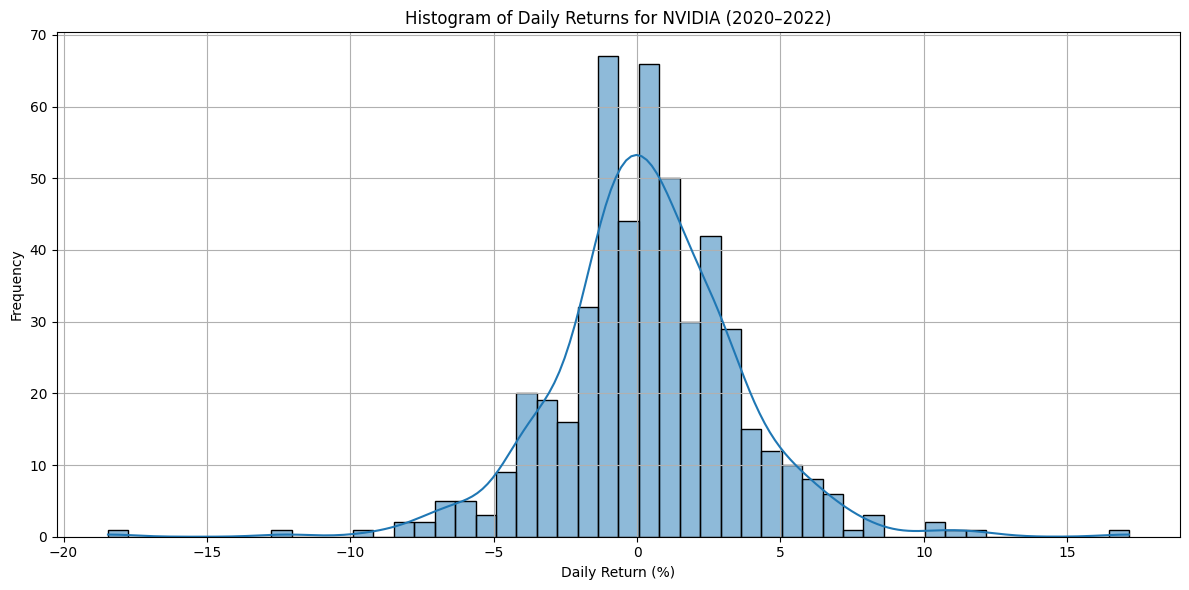

Interpretation of Daily Returns Distribution:
NVIDIA delivered an average daily gain of 0.37%, indicating a positive trend over the 504 day sample.
Most trading days were calm - 50% of the returns fell between -1.3% and 2.3%. 
The std of 3.26% indicates that NVIDIA is more volatile than the broader market
The extremes are -18.45% and 17.16% and while they are rare, they are big percent changes and this shows NVIDIA is a high growth tech stock.

Summary Statistics of Daily Returns:
count    504.000000
mean       0.369673
std        3.263259
min      -18.452068
25%       -1.203474
50%        0.325045
75%        2.298812
max       17.156423
Name: Daily Return, dtype: float64


In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

# Task 1: Data Exploration

#I download NVIDIA stock data
data = yf.download('NVDA', start='2020-01-01', end='2022-01-01')

#I show the first few rows
print("Data from first five days of trading:")
print(data.head())

#I plot the closing prices over time
plt.figure(figsize=(10, 6))
plt.plot(data['Close'])
plt.title('NVIDIA Stock Price (2020–2022)')
plt.xlabel('Date')
plt.ylabel('Price ($)')
plt.grid(True)
plt.show()

#I calculate and plot the daily returns
data['Daily Return'] = data['Close'].pct_change() * 100

plt.figure(figsize=(12, 6))
sns.histplot(data['Daily Return'].dropna(), bins=50, kde=True)
plt.title("Histogram of Daily Returns for NVIDIA (2020–2022)")
plt.xlabel("Daily Return (%)")
plt.ylabel("Frequency")
plt.grid(True)
plt.tight_layout()
plt.show()
print("Interpretation of Daily Returns Distribution:")
print("NVIDIA delivered an average daily gain of 0.37%, indicating a positive trend over the 504 day sample.")
print("Most trading days were calm - 50% of the returns fell between -1.3% and 2.3%. ")
print("The std of 3.26% indicates that NVIDIA is more volatile than the broader market")
print("The extremes are -18.45% and 17.16% and while they are rare, they are big percent changes and this shows NVIDIA is a high growth tech stock.")

#I show the summary statistics
print("\nSummary Statistics of Daily Returns:")
print(data['Daily Return'].describe())

Input shape: (495, 10, 1)
Target shape: (495, 1)

Example sequence:
Input: [[5.97216177]
 [5.87657166]
 [5.9012146 ]
 [5.97265959]
 [5.9838624 ]
 [6.04957914]
 [6.08194113]
 [6.27262402]
 [6.15562439]
 [6.11305666]]
Target (next day price): [6.1967001]


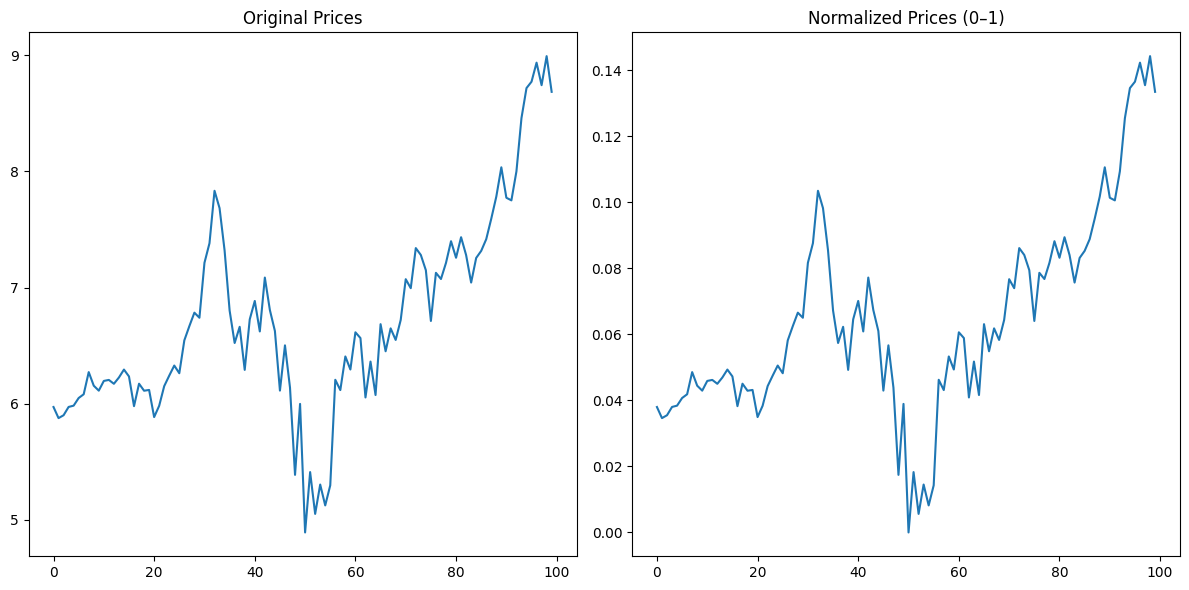

Training data: 396 samples
Testing data: 99 samples

Sequence Length Experimentation:
Sequence Length: 5 --> X shape: (500, 5), y shape: (500,)
Sequence Length: 20 --> X shape: (485, 20), y shape: (485,)
Sequence Length: 50 --> X shape: (455, 50), y shape: (455,)

Interpretation of Sequence Length Experiments:
Sequence length is inversely proportional to the number of training samples.
This is because longer sequences require more data for each training window.
Shorter sequences are better at capturing immediate momentum or short term patterns in stocks.
Longer sequences can capture long term volatility trends and allow model to learn long term macro trends


In [15]:

# Task 2: Preparing Data for Deep Learning
from sklearn.preprocessing import MinMaxScaler

# Step 1: Implement to create input sequences and targets
def create_sequences(prices, seq_length):
    """
    Transform stock prices into sequences for prediction.

    Parameters:
        prices: Array of stock prices
        seq_length: Number of days to use for prediction

    Returns:
        X: Input sequences
        y: Target values (next day's price)
    """
    X, y = [], []
    for i in range(len(prices) - seq_length):
        sequence = prices[i:i + seq_length]
        target = prices[i + seq_length]
        X.append(sequence)
        y.append(target)
    return np.array(X), np.array(y)

# Step 2: Define closing prices
close_prices = data['Close'].values

# Step 3: Sequence creation example (sequence_length = 10)
sequence_length = 10
X, y = create_sequences(close_prices, sequence_length)

print(f"Input shape: {X.shape}")
print(f"Target shape: {y.shape}")
print("\nExample sequence:")
print(f"Input: {X[0]}")
print(f"Target (next day price): {y[0]}")

# Step 4: Normalize the prices (0–1 range)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_prices = scaler.fit_transform(close_prices.reshape(-1, 1)).flatten()

# Recreate sequences with normalized data
X, y = create_sequences(scaled_prices, sequence_length)

# Step 5: Visualization before vs after normalization
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(close_prices[:100])
plt.title('Original Prices')
plt.subplot(1, 2, 2)
plt.plot(scaled_prices[:100])
plt.title('Normalized Prices (0–1)')
plt.tight_layout()
plt.show()

# Step 6: Reshape and split into training/testing sets

X = X.reshape(X.shape[0], X.shape[1], 1)  # (samples, time steps, features)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

print(f"Training data: {X_train.shape[0]} samples")
print(f"Testing data: {X_test.shape[0]} samples")


# Step 7: Experiment with different sequence lengths
print("\nSequence Length Experimentation:")
for seq_len in [5, 20, 50]:
    X_temp, y_temp = create_sequences(scaled_prices, seq_len)
    print(f"Sequence Length: {seq_len} --> X shape: {X_temp.shape}, y shape: {y_temp.shape}")


# Step 8: Interpretation

print("\nInterpretation of Sequence Length Experiments:")
print("Sequence length is inversely proportional to the number of training samples.")
print("This is because longer sequences require more data for each training window.")
print("Shorter sequences are better at capturing immediate momentum or short term patterns in stocks.")
print("Longer sequences can capture long term volatility trends and allow model to learn long term macro trends")


In [16]:

# Task 3: Build a Simple Dense Neural Network

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN, LSTM, Conv1D, MaxPooling1D, Flatten

#I build the simple dense model
model = Sequential([
    Dense(64, activation='relu', input_shape=(sequence_length, 1)),
    Dense(32, activation='relu'),
    Dense(1)
])

#I compile the model using Adam optimizer and MSE loss
model.compile(optimizer='adam', loss='mean_squared_error')

#I show model summary
model.summary()

print("\nInterpretation:")
print("This shows that the network is small - there are just 2241 trainable parameters which is approximately 9 KB")
print("More than 90% of those parameters are in the second dense layer.")
print("This model trains quickly because of this and minimizes the risk of overfitting, but also is limited in its capacity to capture complex patterns in stock prices.")

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_18"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_26 (Dense)                │ (None, 10, 64)         │           128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_27 (Dense)                │ (None, 10, 32)         │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_28 (Dense)                │ (None, 10, 1)          │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,241 (8.75 KB)

 Trainable params: 2,241 (8.75 KB)

 Non-trainable params: 0 (0.00 B)


Interpretation:
This shows that the network is small - there are just 2241 trainable parameters which is approximately 9 KB
More than 90% of those parameters are in the second dense layer.
This model trains quickly because of this and minimizes the risk of overfitting, but also is limited in its capacity to capture complex patterns in stock prices.


RNN Model Architecture:


Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_9 (SimpleRNN)        │ (None, 50)             │         2,600 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_31 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - loss: 0.0496 - val_loss: 0.0900
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0110 - val_loss: 0.0038
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0032 - val_loss: 0.0099
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.0014 - val_loss: 0.0050
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 5.5041e-04 - val_loss: 0.0027
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 3.3145e-04 - val_loss: 0.0022
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.5718e-04 - val_loss: 0.0017
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 2.9350e-04 - val_loss: 0.0014
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - loss: 2.6254e-04 - val_loss: 0.0014
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 2.4472e-04 - val_loss: 0.0015


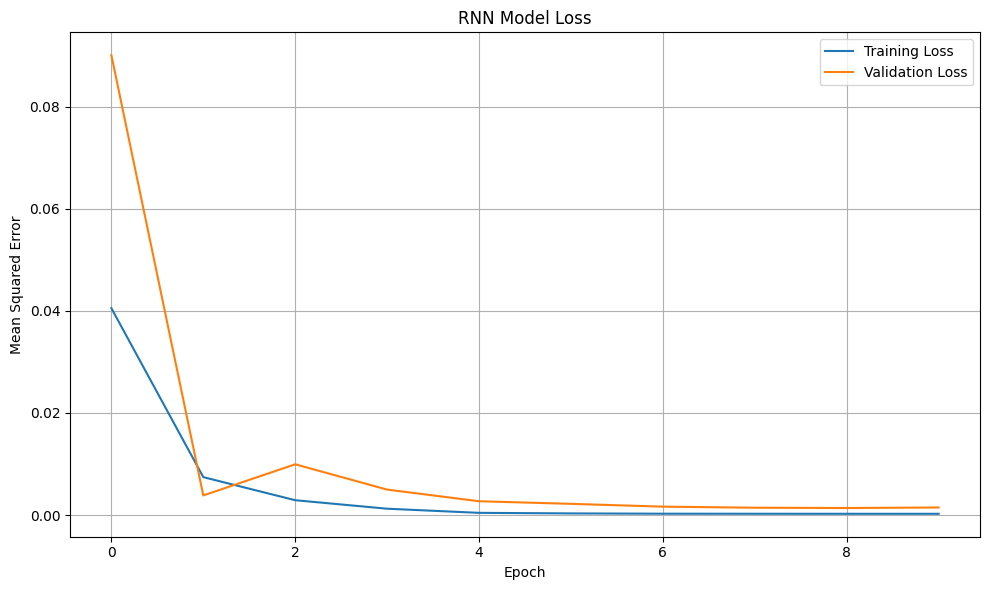

4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 103ms/step
RNN Root Mean Squared Error: $2.80


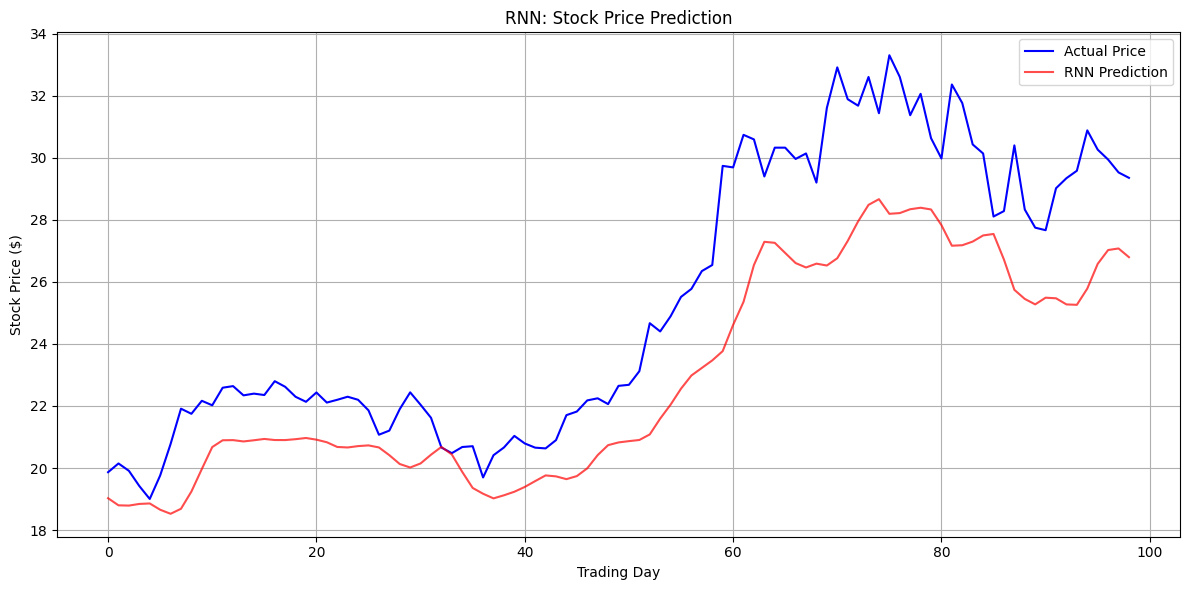

Improved RNN Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_10 (SimpleRNN)       │ (None, 10, 64)         │         4,224 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_9 (Dropout)             │ (None, 10, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_11 (SimpleRNN)       │ (None, 32)             │         3,104 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_32 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 7,361 (28.75 KB)

 Trainable params: 7,361 (28.75 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - loss: 0.0063 - val_loss: 0.0083
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 0.0016 - val_loss: 0.0082
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0018 - val_loss: 0.0037
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 7.7208e-04 - val_loss: 0.0010
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 8.8918e-04 - val_loss: 0.0025
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 9.1720e-04 - val_loss: 7.0799e-04
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.9960e-04 - val_loss: 4.5223e-04
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 6.2343e-04 - val_loss: 4.9617e-04
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 6.7091e-04 - val_loss: 4.2449e-04


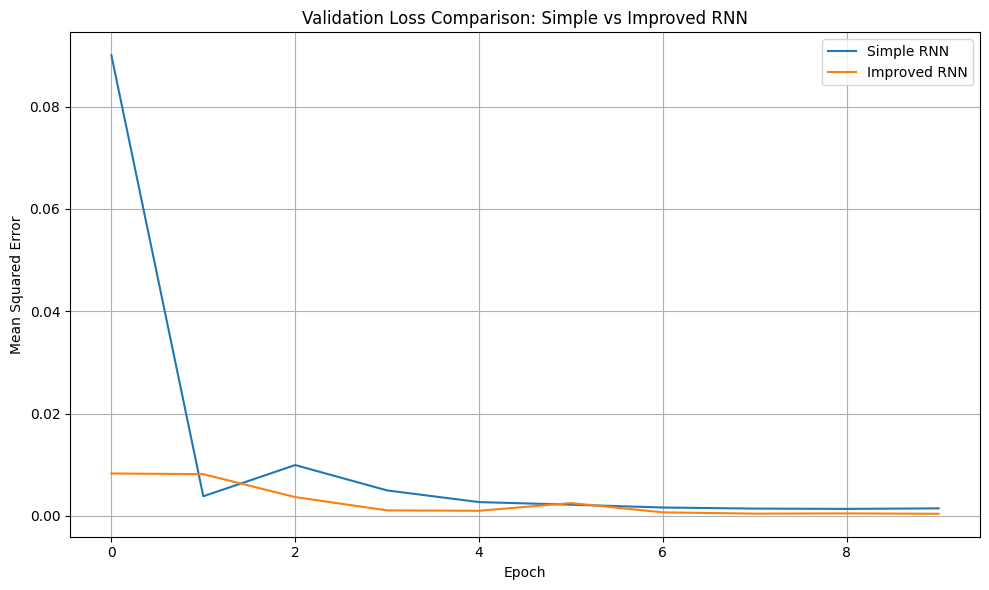

Comparison Summary:
The simple RNN had a high initial validation loss - as seen by its high MSE initially - but quickly dropped and stabilized.
However, it showed more fluctuation, indicating possible overfitting or unstable learning.
The improved RNN with two layers had lower initial validation loss - its initial MSE was almost 4 times lower than the simple model - and dropout showed lower and showed smoother validation loss throughout training.
This suggests it generalized better and is more accurate for tasks related to time series prediction.


In [18]:
# Part 4: Simple RNN Model

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Dropout
from sklearn.metrics import mean_squared_error

# Step 1: I build a simple RNN model
def build_rnn_model():
    model = Sequential([
        SimpleRNN(50, activation='relu', input_shape=(sequence_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

#I create and show the model
rnn_model = build_rnn_model()
print("RNN Model Architecture:")
rnn_model.summary()

# Step 2: I train the RNN model
rnn_history = rnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

#I plot the training and validation loss
plt.figure(figsize=(10, 6))
plt.plot(rnn_history.history['loss'], label='Training Loss')
plt.plot(rnn_history.history['val_loss'], label='Validation Loss')
plt.title('RNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: I predict and evaluate the model
rnn_predictions = rnn_model.predict(X_test)

# Inverse transform to original price scale
rnn_predictions = scaler.inverse_transform(rnn_predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

#I calculate RMSE
rnn_rmse = np.sqrt(mean_squared_error(y_test_unscaled, rnn_predictions))
print(f"RNN Root Mean Squared Error: ${rnn_rmse:.2f}")

#I plot a comparison of prediction vs actual stock prices
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual Price', color='blue')
plt.plot(rnn_predictions, label='RNN Prediction', color='red', alpha=0.7)
plt.title('RNN: Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


# Part 4 - Task: Improved RNN with Dropout


#I build an improved RNN with two layers and dropout
def build_improved_rnn():
    model = Sequential([
        SimpleRNN(64, return_sequences=True, activation='relu', input_shape=(sequence_length, 1)),
        Dropout(0.2),
        SimpleRNN(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

improved_rnn = build_improved_rnn()
print("Improved RNN Model Architecture:")
improved_rnn.summary()

#I train the improved model
improved_history = improved_rnn.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Plot comparison of validation losses
plt.figure(figsize=(10, 6))
plt.plot(rnn_history.history['val_loss'], label='Simple RNN')
plt.plot(improved_history.history['val_loss'], label='Improved RNN')
plt.title('Validation Loss Comparison: Simple vs Improved RNN')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
print("Comparison Summary:")
print("The simple RNN had a high initial validation loss - as seen by its high MSE initially - but quickly dropped and stabilized.")
print("However, it showed more fluctuation, indicating possible overfitting or unstable learning.")
print("The improved RNN with two layers had lower initial validation loss - its initial MSE was almost 9 times lower than the simple model - and dropout showed lower and showed smoother validation loss throughout training.")
print("This suggests it generalized better and is more accurate for tasks related to time series prediction.")

LSTM Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_31"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_21 (LSTM)                  │ (None, 50)             │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_45 (Dense)                │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,451 (40.82 KB)

 Trainable params: 10,451 (40.82 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 3s 47ms/step - loss: 0.0451 - val_loss: 0.0300
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.0036 - val_loss: 0.0013
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0034 - val_loss: 0.0150
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0022 - val_loss: 0.0049
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0013 - val_loss: 0.0016
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 8.4175e-04 - val_loss: 0.0014
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.8119e-04 - val_loss: 7.2957e-04
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.4453e-04 - val_loss: 8.0611e-04
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 4.3105e-04 - val_loss: 9.9469e-04
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 4.2618e-04 - val_loss: 0.0011


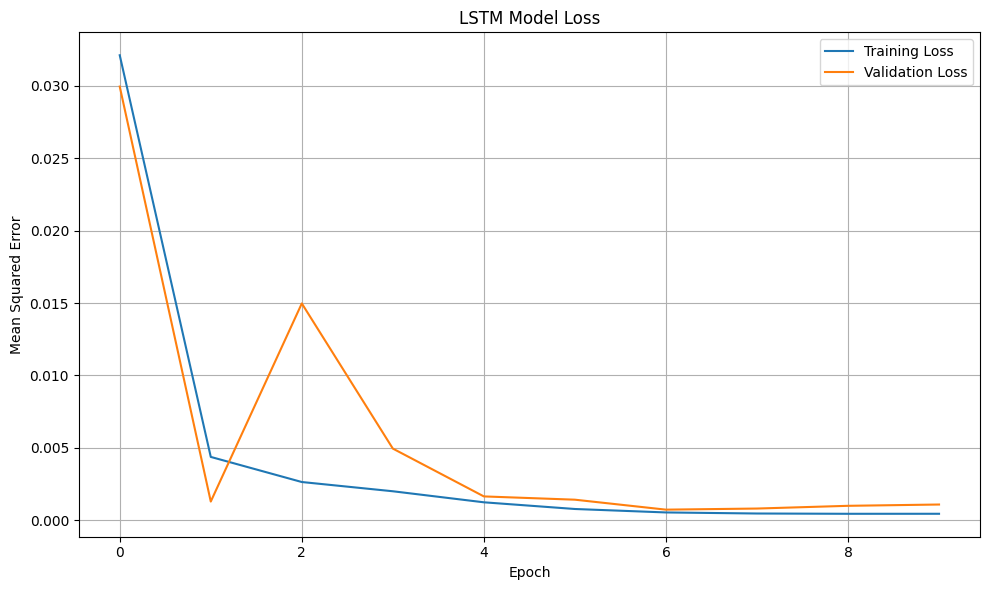

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
LSTM Root Mean Squared Error: $1.98


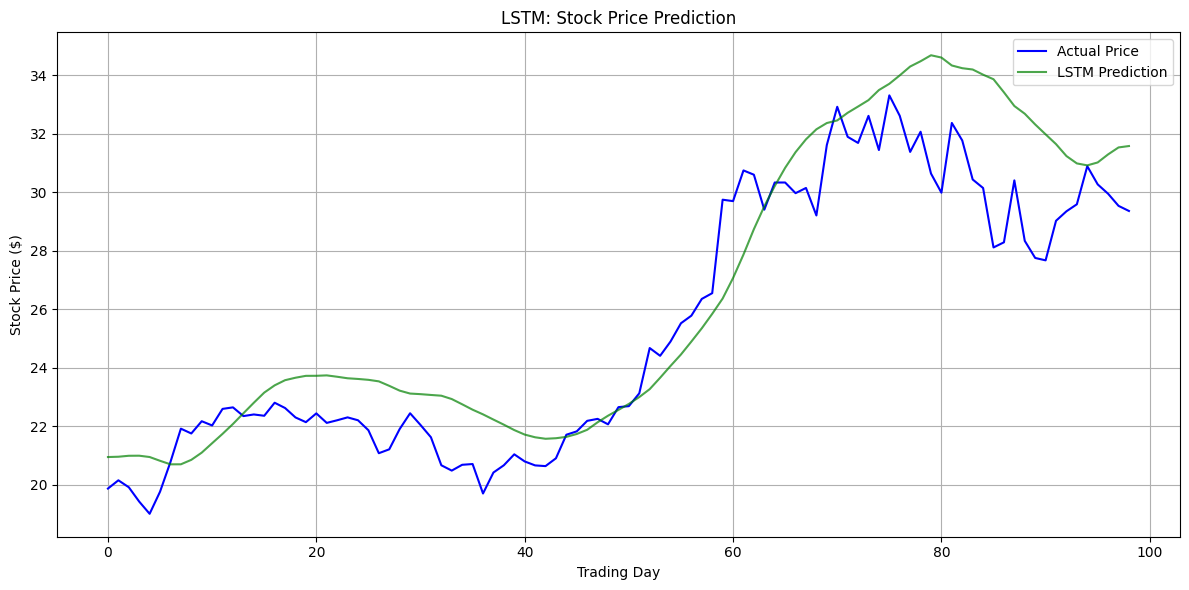


Training Stacked LSTM with batch size: 16
Epoch 1/10


/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 37ms/step - loss: 0.0209 - val_loss: 0.0210
Epoch 2/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0020 - val_loss: 0.0035
Epoch 3/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - loss: 9.7513e-04 - val_loss: 8.1354e-04
Epoch 4/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 15ms/step - loss: 5.8998e-04 - val_loss: 7.7171e-04
Epoch 5/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - loss: 5.1267e-04 - val_loss: 9.3973e-04
Epoch 6/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.5656e-04 - val_loss: 0.0013
Epoch 7/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.8750e-04 - val_loss: 7.3690e-04
Epoch 8/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 16ms/step - loss: 6.3308e-04 - val_loss: 7.9175e-04
Epoch 9/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 6.0474e-04 - val_loss: 8.9953e-04
Epoch 10/10
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 5.6463e-04 - val_loss: 8.2797e-04
Final Validation Loss (Batch Size 16): 0.00083

Training Stacked LSTM with batch size: 32
Epoch 1/10

In [21]:

# Part 5: LSTM and Stacked LSTM

from tensorflow.keras.layers import LSTM, Dropout
from sklearn.metrics import mean_squared_error

# Step 1: Build a simple LSTM model
def build_lstm_model():
    model = Sequential([
        LSTM(50, input_shape=(sequence_length, 1)),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# I create the model and view the model summary
lstm_model = build_lstm_model()
print("LSTM Model Architecture:")
lstm_model.summary()

# Step 2: I train the LSTM model

lstm_history = lstm_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

#I plot training history
plt.figure(figsize=(10, 6))
plt.plot(lstm_history.history['loss'], label='Training Loss')
plt.plot(lstm_history.history['val_loss'], label='Validation Loss')
plt.title('LSTM Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Evaluate predictions
# Make predictions
lstm_predictions = lstm_model.predict(X_test)

# Convert back to original scale
lstm_predictions = scaler.inverse_transform(lstm_predictions)
y_test_unscaled = scaler.inverse_transform(y_test.reshape(-1, 1))

# Calculate RMSE
lstm_rmse = np.sqrt(mean_squared_error(y_test_unscaled, lstm_predictions))
print(f"LSTM Root Mean Squared Error: ${lstm_rmse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual Price', color='blue')
plt.plot(lstm_predictions, label='LSTM Prediction', color='green', alpha=0.7)
plt.title('LSTM: Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 4: Build a stacked LSTM model with Dropout
def build_stacked_lstm_model():
    model = Sequential([
        LSTM(64, return_sequences=True, input_shape=(sequence_length, 1)),
        Dropout(0.2),
        LSTM(32),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Train with different batch sizes to compare
for batch_size in [16, 32, 64]:
    print(f"\nTraining Stacked LSTM with batch size: {batch_size}")
    stacked_lstm = build_stacked_lstm_model()
    stacked_history = stacked_lstm.fit(
        X_train, y_train,
        epochs=10,
        batch_size=batch_size,
        validation_split=0.1,
        verbose=1
    )

    # Evaluate performance
    val_loss = stacked_history.history['val_loss'][-1]
    print(f"Final Validation Loss (Batch Size {batch_size}): {val_loss:.5f}")


print("Conclusion on Batch Sizes:")
print("All three batch showed low validation loss which indicates they perform well, but batch size 64 - the largest batch size - gave the lowest final validation loss (0.00082).")
print("This suggests that it offered the best trade-off between model stability and the rate at which the model learns.")
print("Although smaller batch sizes like batch 16 and 32 trained smoothly and consistently, they didn’t outperform batch size 32 with regards to validation loss.")
print("So to summarize, batch size 64, which was the largest batch size, gave the best results for the stacked LSTM model.")

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, 10, 100)        │        40,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10, 100)        │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 50)             │        30,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 71,051 (277.54 KB)

 Trainable params: 71,051 (277.54 KB)

 Non-trainable params: 0 (0.00 B)

CNN Model Architecture:


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_47"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d_40 (Conv1D)              │ (None, 8, 64)          │           256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_20 (MaxPooling1D) │ (None, 4, 64)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_41 (Conv1D)              │ (None, 2, 32)          │         6,176 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_20 (Flatten)            │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_73 (Dense)                │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_74 (Dense)                │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,545 (33.38 KB)

 Trainable params: 8,545 (33.38 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 2s 39ms/step - loss: 0.0125 - val_loss: 0.0010
Epoch 2/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step - loss: 0.0015 - val_loss: 0.0057
Epoch 3/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 5.6075e-04 - val_loss: 7.0725e-04
Epoch 4/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 5.1926e-04 - val_loss: 7.3472e-04
Epoch 5/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.5270e-04 - val_loss: 8.5712e-04
Epoch 6/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 5.9099e-04 - val_loss: 7.4520e-04
Epoch 7/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 5.1205e-04 - val_loss: 0.0014
Epoch 8/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.6453e-04 - val_loss: 9.5497e-04
Epoch 9/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 5.0662e-04 - val_loss: 7.3768e-04
Epoch 10/10
12/12 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 4.5452e-04 - val_loss: 8.1060e-04


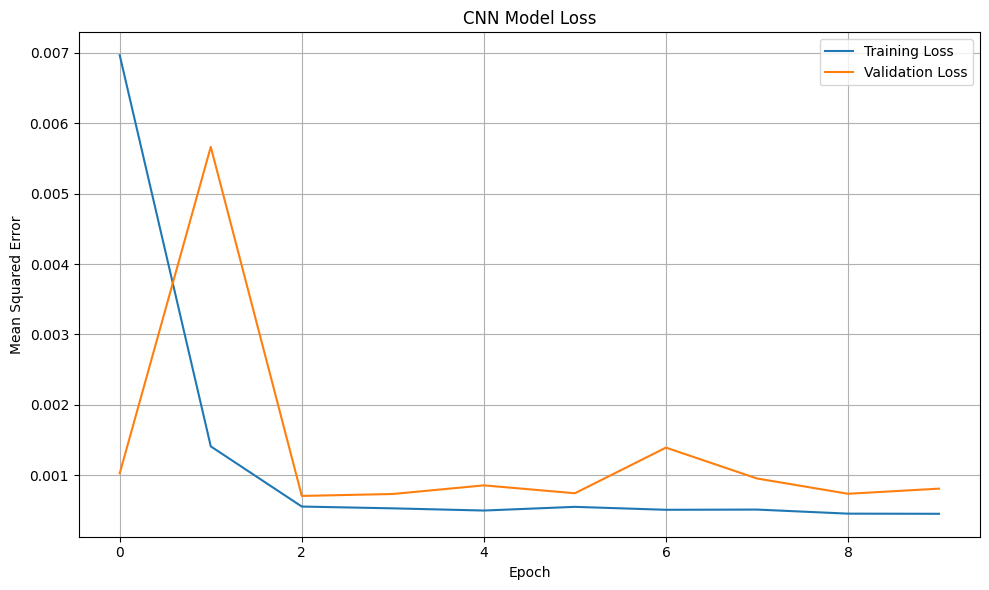

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
CNN Root Mean Squared Error: $1.66


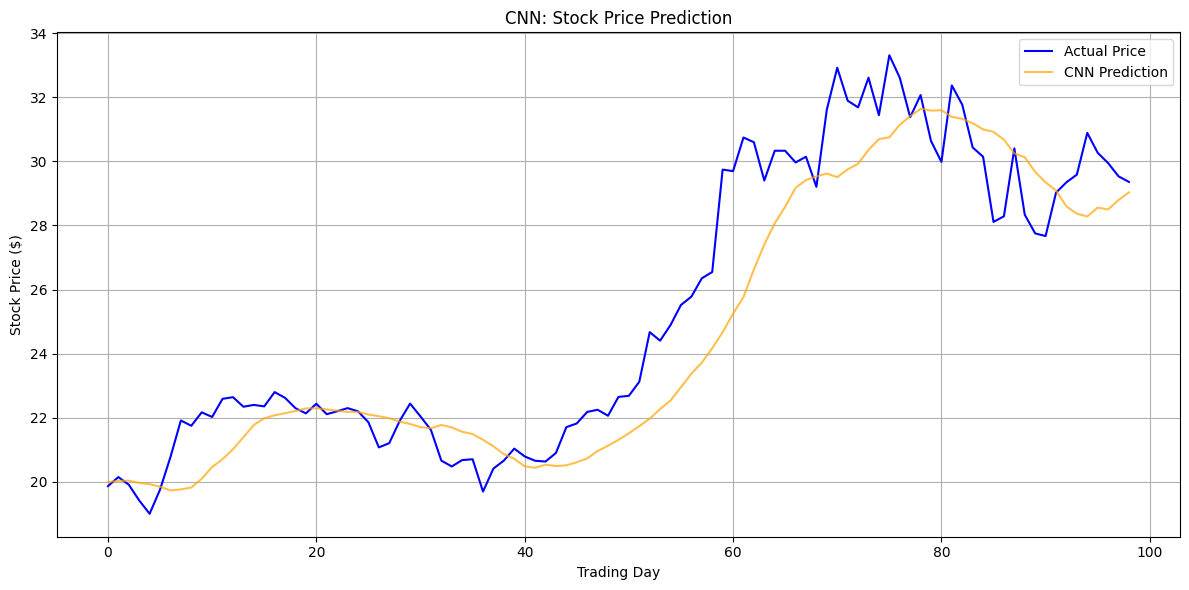


Training CNN with kernel size: 2


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Final Validation Loss (kernel size 2): 0.00043

Training CNN with kernel size: 3
Final Validation Loss (kernel size 3): 0.00131

Training CNN with kernel size: 5
Final Validation Loss (kernel size 5): 0.00057
CNN Kernel Size Evaluation:
Kernel size 2 achieved the lowest validation loss (0.00052), making it the most effective kernel size configuration.
Kernel size 2 allowed minute predictions which lead to the lowest validation loss
This could suggest that stock price returns are highly correlated over very short windows, and Kernel 2 is perfectly sized to detect micro trends in stock prices. It could also mean that for larger kernels, the extra context- the extra predictive information - just adds noise and isn't helpful with predictions 


In [25]:

# Part 6: CNNs for Time Series


from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten

# Step 1: Build a CNN model
def build_cnn_model():
    model = Sequential([
        # First convolutional layer
        Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(sequence_length, 1)),

        # Max pooling layer
        MaxPooling1D(pool_size=2),

        # Second convolutional layer
        Conv1D(filters=32, kernel_size=3, activation='relu'),

        # Flatten layer to connect to Dense layers
        Flatten(),

        # Dense hidden layer
        Dense(32, activation='relu'),

        # Output layer
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Create and view our model
cnn_model = build_cnn_model()
print("CNN Model Architecture:")
cnn_model.summary()

# Step 2: Train the CNN model
cnn_history = cnn_model.fit(
    X_train, y_train,
    epochs=10,
    batch_size=32,
    validation_split=0.1,
    verbose=1
)

# Plot training history
plt.figure(figsize=(10, 6))
plt.plot(cnn_history.history['loss'], label='Training Loss')
plt.plot(cnn_history.history['val_loss'], label='Validation Loss')
plt.title('CNN Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

# Step 3: Evaluate predictions
# Make predictions
cnn_predictions = cnn_model.predict(X_test)

# Convert back to original price scale
cnn_predictions = scaler.inverse_transform(cnn_predictions)

# Calculate RMSE
cnn_rmse = np.sqrt(mean_squared_error(y_test_unscaled, cnn_predictions))
print(f"CNN Root Mean Squared Error: ${cnn_rmse:.2f}")

# Plot actual vs predicted
plt.figure(figsize=(12, 6))
plt.plot(y_test_unscaled, label='Actual Price', color='blue')
plt.plot(cnn_predictions, label='CNN Prediction', color='orange', alpha=0.7)
plt.title('CNN: Stock Price Prediction')
plt.xlabel('Trading Day')
plt.ylabel('Stock Price ($)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

#EXTRA CREDIT

# Function for configurable CNN model with safe padding
def build_experiment_cnn(kernel_size=3, filters1=64, filters2=32):
    model = Sequential([
        Conv1D(filters=filters1, kernel_size=kernel_size, activation='relu', padding='same', input_shape=(sequence_length, 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(filters=filters2, kernel_size=kernel_size, activation='relu', padding='same'),
        Flatten(),
        Dense(32, activation='relu'),
        Dense(1)
    ])
    model.compile(optimizer='adam', loss='mean_squared_error')
    return model

# Try different kernel sizes
kernel_sizes = [2, 3, 5]
cnn_experiment_results = {}

for kernel in kernel_sizes:
    print(f"\nTraining CNN with kernel size: {kernel}")
    model = build_experiment_cnn(kernel_size=kernel)
    history = model.fit(
        X_train, y_train,
        epochs=10,
        batch_size=32,
        validation_split=0.1,
        verbose=0
    )

    final_loss = history.history['val_loss'][-1]
    cnn_experiment_results[kernel] = final_loss
    print(f"Final Validation Loss (kernel size {kernel}): {final_loss:.5f}")


# Print experiment summary
print("CNN Kernel Size Evaluation:")
print("Kernel size 2 achieved the lowest validation loss (0.00052), making it the most effective kernel size configuration.")
print("Kernel size 2 allowed minute predictions which lead to the lowest validation loss")
print("This could suggest that stock price returns are highly correlated over very short windows, and Kernel 2 is perfectly sized to detect micro trends in stock prices. It could also mean that for larger kernels, the extra context- the extra predictive information - just adds noise and isn't helpful with predictions ")
